In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import seaborn as sns
from scipy import stats

# 보팅 실습

In [2]:
df=pd.read_csv("wine_data.csv")

In [3]:
df

,Alcohol,Malic,Ash,Alcalinity,Magesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


In [15]:
features = ['Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magesium', 'Phenols', 'Flavanoids', 
            'Nonflavanoids', 'Proanthocyanins', 'Color','Hue', 'Dilution', 'Proline']

X = df[features]
y = df['class']

In [16]:
# 트레이닝/테스트 데이터 분할
from sklearn.model_selection import train_test_split
X_tn, X_te, y_tn, y_te=train_test_split(X,y,random_state=0)

In [17]:
#데이터 표준화
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale.fit(X_tn)
X_tn_std = std_scale.transform(X_tn)
X_te_std  = std_scale.transform(X_te)

In [18]:
# 보팅 학습
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier

In [22]:
clf1 = LogisticRegression(multi_class="multinomial",random_state=1)
clf2 = svm.SVC(kernel='linear') 
clf3 = GaussianNB()

clf_voting = VotingClassifier(
                estimators=[
                    ('lr', clf1), 
                    ('svm', clf2), 
                    ('gnb', clf3)
                ],
                voting='hard',
                weights=[1,1,1])
clf_voting.fit(X_tn_std, y_tn)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(multi_class='multinomial',
                                                 random_state=1)),
                             ('svm', SVC(kernel='linear')),
                             ('gnb', GaussianNB())],
                 weights=[1, 1, 1])

In [23]:
# 예측
pred_voting = clf_voting.predict(X_te_std)
print(pred_voting)

[0 2 1 0 1 1 0 2 1 1 2 2 0 1 2 1 0 0 1 0 1 0 0 1 1 1 1 1 1 2 0 0 1 0 0 0 2
 1 1 2 0 0 1 1 1]


In [24]:
# 정확도(accuracy)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_te, pred_voting)
print(accuracy)

1.0


In [25]:
# 정밀도(precision)
from sklearn.metrics import precision_score
precision = precision_score(y_te, pred_voting, average='macro')
print(precision)

1.0


In [26]:
# 리콜
from sklearn.metrics import recall_score
recall = recall_score(y_te, pred_voting, average='macro')
print(recall)

1.0


In [28]:
# f1 스코어
from sklearn.metrics import f1_score
f1 = f1_score(y_te, pred_voting, average='macro')
print(f1)

1.0


In [29]:
# confusion matrix 확인 
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_te, pred_voting)
print(conf_matrix)

[[16  0  0]
 [ 0 21  0]
 [ 0  0  8]]


In [30]:
# 분류 레포트 확인
from sklearn.metrics import classification_report
class_report = classification_report(y_te, pred_voting)
print(class_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00         8

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



# 랜덤 포레스트 실습

In [31]:
df=pd.read_csv("wine_data.csv")

In [32]:
df

,Alcohol,Malic,Ash,Alcalinity,Magesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


In [33]:
features = ['Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magesium', 'Phenols', 'Flavanoids', 
            'Nonflavanoids', 'Proanthocyanins', 'Color','Hue', 'Dilution', 'Proline']

X = df[features]
y = df['class']

In [34]:
# 트레이닝/테스트 데이터 분할
from sklearn.model_selection import train_test_split
X_tn, X_te, y_tn, y_te=train_test_split(X,y,random_state=0)

In [35]:
#데이터 표준화
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale.fit(X_tn)
X_tn_std = std_scale.transform(X_tn)
X_te_std  = std_scale.transform(X_te)

In [36]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(max_depth=2, 
                                random_state=0)
clf_rf.fit(X_tn_std, y_tn)

RandomForestClassifier(max_depth=2, random_state=0)

In [37]:
# 예측
pred_rf = clf_rf.predict(X_te_std)
print(pred_rf)

[0 2 1 0 1 1 0 2 1 1 2 2 0 1 2 1 0 0 2 0 0 0 0 1 1 1 1 1 1 2 0 0 1 0 0 0 2
 1 1 2 0 0 1 1 1]


In [38]:
# 정확도(accuracy)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_te, pred_rf)
print(accuracy)

0.9555555555555556


In [39]:
# 정밀도(precision)
from sklearn.metrics import precision_score
precision = precision_score(y_te, pred_rf, average='macro')
print(precision)

0.943355119825708


In [40]:
# 리콜
from sklearn.metrics import recall_score
recall = recall_score(y_te, pred_rf, average='macro')
print(recall)

0.9682539682539683


In [41]:
# f1 스코어
from sklearn.metrics import f1_score
f1 = f1_score(y_te, pred_rf, average='macro')
print(f1)

0.9536244800950685


In [42]:
# confusion matrix 확인 
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_te, pred_rf)
print(conf_matrix)

[[16  0  0]
 [ 1 19  1]
 [ 0  0  8]]


In [43]:
# 분류 레포트 확인
from sklearn.metrics import classification_report
class_report = classification_report(y_te, pred_rf)
print(class_report)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        16
           1       1.00      0.90      0.95        21
           2       0.89      1.00      0.94         8

    accuracy                           0.96        45
   macro avg       0.94      0.97      0.95        45
weighted avg       0.96      0.96      0.96        45



# 배깅 실습

In [45]:
import pandas as pd
df = pd.read_csv("wine_data.csv")

In [46]:
df

,Alcohol,Malic,Ash,Alcalinity,Magesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


In [47]:
features = ['Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magesium', 'Phenols', 'Flavanoids', 
            'Nonflavanoids', 'Proanthocyanins', 'Color','Hue', 'Dilution', 'Proline']

X = df[features]
y = df['class']

In [48]:
# 트레이닝/테스트 데이터 분할
from sklearn.model_selection import train_test_split
X_tn, X_te, y_tn, y_te=train_test_split(X,y,random_state=0)

In [49]:
#데이터 표준화
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale.fit(X_tn)
X_tn_std = std_scale.transform(X_tn)
X_te_std  = std_scale.transform(X_te)

In [51]:
# 배깅 학습
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
clf_bagging = BaggingClassifier(base_estimator=GaussianNB(),
                        n_estimators=10, 
                        random_state=0)
clf_bagging.fit(X_tn_std, y_tn)

BaggingClassifier(base_estimator=GaussianNB(), random_state=0)

In [52]:
# 예측
pred_bagging = clf_bagging.predict(X_te_std)
print(pred_bagging)

[0 2 1 0 1 1 0 2 1 1 2 2 0 1 2 1 0 0 2 0 0 0 0 1 1 1 1 1 1 2 0 0 1 0 0 0 2
 1 1 2 0 0 1 1 1]


In [53]:
# 정확도(accuracy)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_te, pred_bagging)
print(accuracy)

0.9555555555555556


In [54]:
# 정밀도(precision)
from sklearn.metrics import precision_score
precision = precision_score(y_te, pred_bagging, average='macro')
print(precision)

0.943355119825708


In [55]:
# 리콜
from sklearn.metrics import recall_score
recall = recall_score(y_te, pred_bagging, average='macro')
print(recall)

0.9682539682539683


In [56]:
# f1 score
from sklearn.metrics import f1_score
f1 = f1_score(y_te, pred_bagging, average='macro')
print(f1)

0.9536244800950685


In [57]:
# confusion matrix 확인 
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_te, pred_bagging)
print(conf_matrix)

[[16  0  0]
 [ 1 19  1]
 [ 0  0  8]]


In [58]:
# 분류 레포트 확인
from sklearn.metrics import classification_report
class_report = classification_report(y_te, pred_bagging)
print(class_report)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        16
           1       1.00      0.90      0.95        21
           2       0.89      1.00      0.94         8

    accuracy                           0.96        45
   macro avg       0.94      0.97      0.95        45
weighted avg       0.96      0.96      0.96        45



# 에이다 부스트  실습

In [59]:
df = pd.read_csv("wine_data.csv")
df

,Alcohol,Malic,Ash,Alcalinity,Magesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


In [60]:
features = ['Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magesium', 'Phenols', 'Flavanoids', 
            'Nonflavanoids', 'Proanthocyanins', 'Color','Hue', 'Dilution', 'Proline']

X = df[features]
y = df['class']

In [61]:
# 트레이닝/테스트 데이터 분할
from sklearn.model_selection import train_test_split
X_tn, X_te, y_tn, y_te=train_test_split(X,y,random_state=0)

In [62]:
#데이터 표준화
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale.fit(X_tn)
X_tn_std = std_scale.transform(X_tn)
X_te_std  = std_scale.transform(X_te)

In [63]:
# 에이다 부스트 학습
from sklearn.ensemble import AdaBoostClassifier
clf_ada = AdaBoostClassifier(random_state=0)
clf_ada.fit(X_tn_std, y_tn)

AdaBoostClassifier(random_state=0)

In [64]:
# 예측
pred_ada = clf_ada.predict(X_te_std)
print(pred_ada)

[0 2 0 0 1 0 0 2 1 1 2 2 0 0 2 1 0 0 1 0 0 0 0 1 1 1 1 1 1 2 0 0 1 0 0 0 2
 1 0 2 1 0 1 1 1]


In [65]:
# 정확도(accuracy)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_te, pred_ada)
print(accuracy)

0.8666666666666667


In [66]:
# 정밀도(precision)
from sklearn.metrics import precision_score
precision = precision_score(y_te, pred_ada, average='macro')
print(precision)

0.8970588235294118


In [67]:
# 리콜
from sklearn.metrics import recall_score
recall = recall_score(y_te, pred_ada, average='macro')
print(recall)

0.8998015873015873


In [68]:
# f1 스코어
from sklearn.metrics import f1_score
f1 = f1_score(y_te, pred_ada, average='macro')
print(f1)

0.8918128654970761


In [69]:
# confusion matrix 확인 
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_te, pred_ada)
print(conf_matrix)

[[15  1  0]
 [ 5 16  0]
 [ 0  0  8]]


In [70]:
# 분류 레포트 확인
from sklearn.metrics import classification_report
class_report = classification_report(y_te, pred_ada)
print(class_report)

              precision    recall  f1-score   support

           0       0.75      0.94      0.83        16
           1       0.94      0.76      0.84        21
           2       1.00      1.00      1.00         8

    accuracy                           0.87        45
   macro avg       0.90      0.90      0.89        45
weighted avg       0.88      0.87      0.87        45



# 그라디언트 부스트 

In [82]:
df = pd.read_csv("wine_data.csv")
df

,Alcohol,Malic,Ash,Alcalinity,Magesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


In [71]:
features = ['Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magesium', 'Phenols', 'Flavanoids', 
            'Nonflavanoids', 'Proanthocyanins', 'Color','Hue', 'Dilution', 'Proline']

X = df[features]
y = df['class']

In [72]:
# 트레이닝/테스트 데이터 분할
from sklearn.model_selection import train_test_split
X_tn, X_te, y_tn, y_te=train_test_split(X,y,random_state=0)

In [73]:
#데이터 표준화
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale.fit(X_tn)
X_tn_std = std_scale.transform(X_tn)
X_te_std  = std_scale.transform(X_te)

In [74]:
# Gradient Boosting 학습
from sklearn.ensemble import GradientBoostingClassifier
clf_gbt = GradientBoostingClassifier(max_depth=2, 
                                     learning_rate=0.1,
                                     random_state=0)
clf_gbt.fit(X_tn_std, y_tn)

GradientBoostingClassifier(max_depth=2, random_state=0)

In [75]:
# 예측
pred_gboost = clf_gbt.predict(X_te_std)
print(pred_gboost)

[0 2 1 0 1 0 0 2 1 1 2 2 0 1 2 1 0 0 2 0 1 0 0 1 1 1 1 1 1 2 0 0 1 0 0 0 2
 1 1 2 0 0 1 1 1]


In [76]:
# 정확도(accuracy)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_te, pred_gboost)
print(accuracy)

0.9555555555555556


In [77]:
# 정밀도(precision)
from sklearn.metrics import precision_score
precision = precision_score(y_te, pred_gboost, average='macro')
print(precision)

0.943355119825708


In [78]:
# 리콜
from sklearn.metrics import recall_score
recall = recall_score(y_te, pred_gboost, average='macro')
print(recall)

0.9682539682539683


In [79]:
# f1 스코어
from sklearn.metrics import f1_score
f1 = f1_score(y_te, pred_gboost, average='macro')
print(f1)

0.9536244800950685


In [80]:
# confusion matrix 확인 
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_te, pred_gboost)
print(conf_matrix)

[[16  0  0]
 [ 1 19  1]
 [ 0  0  8]]


In [81]:
# 분류 레포트 확인
from sklearn.metrics import classification_report
class_report = classification_report(y_te, pred_gboost)
print(class_report)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        16
           1       1.00      0.90      0.95        21
           2       0.89      1.00      0.94         8

    accuracy                           0.96        45
   macro avg       0.94      0.97      0.95        45
weighted avg       0.96      0.96      0.96        45



# 스태킹 실습

In [83]:
df = pd.read_csv("wine_data.csv")
df

,Alcohol,Malic,Ash,Alcalinity,Magesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


In [84]:
features = ['Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magesium', 'Phenols', 'Flavanoids', 
            'Nonflavanoids', 'Proanthocyanins', 'Color','Hue', 'Dilution', 'Proline']

X = df[features]
y = df['class']

In [85]:
# 트레이닝/테스트 데이터 분할
from sklearn.model_selection import train_test_split
X_tn, X_te, y_tn, y_te=train_test_split(X,y,random_state=0)

In [86]:
#데이터 표준화
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale.fit(X_tn)
X_tn_std = std_scale.transform(X_tn)
X_te_std  = std_scale.transform(X_te)

In [87]:
# 스태킹 학습
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier

clf1 = svm.SVC(kernel='linear', random_state=1) 
clf2 = GaussianNB()

clf_stkg = StackingClassifier(
            estimators=[
                ('svm', clf1), 
                ('gnb', clf2)
            ],
            final_estimator=LogisticRegression())
clf_stkg.fit(X_tn_std, y_tn)

StackingClassifier(estimators=[('svm', SVC(kernel='linear', random_state=1)),
                               ('gnb', GaussianNB())],
                   final_estimator=LogisticRegression())

In [88]:
# 예측
pred_stkg = clf_stkg.predict(X_te_std)
print(pred_stkg)

[0 2 1 0 1 1 0 2 1 1 2 2 0 1 2 1 0 0 2 0 0 0 0 1 1 1 1 1 1 2 0 0 1 0 0 0 2
 1 1 2 0 0 1 1 1]


In [89]:
# 정확도(accuracy)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_te, pred_stkg)
print(accuracy)

0.9555555555555556


In [90]:
# 정밀도(precision)
from sklearn.metrics import precision_score
precision = precision_score(y_te, pred_stkg, average='macro')
print(precision)

0.943355119825708


In [91]:
# 리콜
from sklearn.metrics import recall_score
recall = recall_score(y_te, pred_stkg, average='macro')
print(recall)

0.9682539682539683


In [92]:
# f1 스코어
from sklearn.metrics import f1_score
f1 = f1_score(y_te, pred_stkg, average='macro')
print(f1)

0.9536244800950685


In [93]:
# confusion matrix 확인 
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_te, pred_stkg)
print(conf_matrix)

[[16  0  0]
 [ 1 19  1]
 [ 0  0  8]]


In [94]:
# 분류 레포트 확인
from sklearn.metrics import classification_report
class_report = classification_report(y_te, pred_stkg)
print(class_report)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        16
           1       1.00      0.90      0.95        21
           2       0.89      1.00      0.94         8

    accuracy                           0.96        45
   macro avg       0.94      0.97      0.95        45
weighted avg       0.96      0.96      0.96        45



# k 평균 클러스터링

In [96]:
#임의 데이터 생성
from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples=100, 
                 n_features=2, 
                 centers=5, 
                 random_state=10)

In [97]:
# 생성된 데이터 차원 확인
print(X.shape)
print(y.shape)

(100, 2)
(100,)


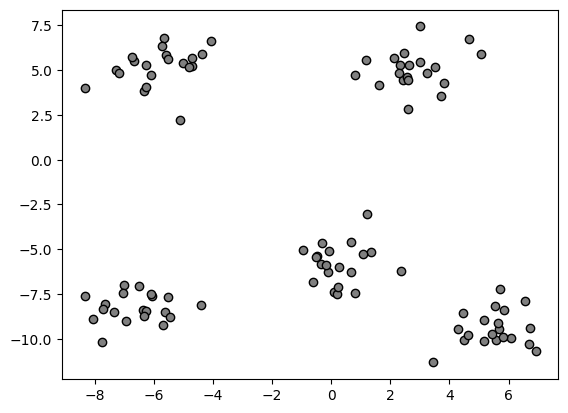

In [98]:
# 라벨링 되지 않은 데이터 플랏
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], 
            c='gray', 
            edgecolor='black', 
            marker='o')
plt.show()

In [99]:
# k-means clustering
from sklearn.cluster import KMeans
kmc = KMeans(n_clusters=5, 
             init='random', 
             max_iter=100, 
             random_state=0)
kmc.fit(X)
label_kmc = kmc.labels_ 
print(label_kmc)

[2 4 3 1 0 2 2 3 0 2 3 2 0 1 0 2 4 1 0 2 2 1 4 3 2 2 1 0 3 4 1 1 0 1 2 0 3
 1 3 4 1 1 1 0 3 3 2 0 4 0 4 0 2 3 0 0 1 4 1 3 0 4 4 1 2 4 0 4 0 3 3 2 4 0
 1 1 3 4 2 2 0 0 4 1 4 3 1 3 1 3 4 3 2 4 4 4 3 2 2 3]


In [100]:
# 시각화를 위한 데이터프레임 생성
import pandas as pd
kmc_columns = ['kmc_comp1', 'kmc_comp2']
X_kmc_df = pd.DataFrame(X, columns=kmc_columns)
X_kmc_df['target'] = y
X_kmc_df['label_kmc'] = label_kmc
X_kmc_df.head(5)

,kmc_comp1,kmc_comp2,target,label_kmc
0,-5.577854,5.872988,3,2
1,1.627832,4.178069,1,4
2,-6.950884,-9.024594,4,3
3,-0.952769,-5.034316,2,1
4,6.550104,-7.912339,0,0


In [101]:
# 타겟 클래스 종류 확인
print(set(X_kmc_df['target']))
print(set(X_kmc_df['label_kmc']))

{0, 1, 2, 3, 4}
{0, 1, 2, 3, 4}


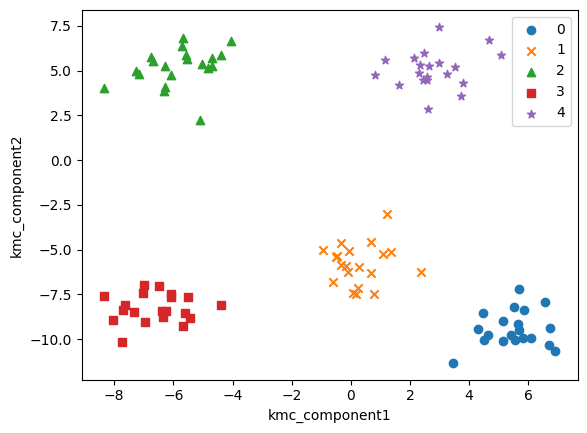

In [102]:
# k-means clustering을 이용한 데이터 플랏
df = X_kmc_df
markers=['o','x','^','s','*']

for i, mark in enumerate(markers):
    df_i = df[df['label_kmc']==i]
    target_i = i
    X1 = df_i['kmc_comp1']
    X2 = df_i['kmc_comp2']
    plt.scatter(X1, X2, 
                marker=mark, 
                label=target_i)

plt.xlabel('kmc_component1')
plt.ylabel('kmc_component2')
plt.legend()
plt.show()

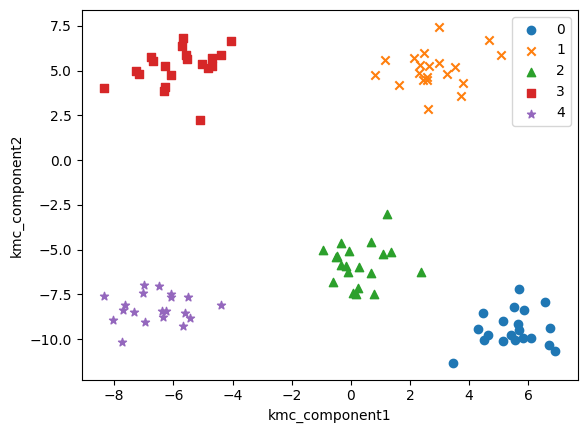

In [103]:
# 실제 타겟 플랏
df = X_kmc_df
markers=['o','x','^','s','*']

for i, mark in enumerate(markers):
    df_i = df[df['target']==i]
    target_i = i
    X1 = df_i['kmc_comp1']
    X2 = df_i['kmc_comp2']
    plt.scatter(X1, X2, 
                marker=mark, 
                label=target_i)

plt.xlabel('kmc_component1')
plt.ylabel('kmc_component2')
plt.legend()
plt.show()

In [104]:
# 모형 평가
from sklearn.metrics import silhouette_score
sil_score = silhouette_score(X, label_kmc)
print(sil_score)

0.7598181300128782


# 주성분 분석 실습

In [105]:
df = pd.read_csv("wine_data.csv")
df

,Alcohol,Malic,Ash,Alcalinity,Magesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


In [106]:
features = ['Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magesium', 'Phenols', 'Flavanoids', 
            'Nonflavanoids', 'Proanthocyanins', 'Color','Hue', 'Dilution', 'Proline']

X = df[features]
y = df['class']

In [107]:
# 트레이닝/테스트 데이터 분할
from sklearn.model_selection import train_test_split
X_tn, X_te, y_tn, y_te=train_test_split(X,y,random_state=0)

In [108]:
#데이터 표준화
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale.fit(X_tn)
X_tn_std = std_scale.transform(X_tn)
X_te_std  = std_scale.transform(X_te)

In [109]:
# PCA 
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_tn_std)
X_tn_pca = pca.transform(X_tn_std)
X_te_pca = pca.transform(X_te_std)

In [110]:
# 차원축소 확인
print(X_tn_std.shape)# 차원 축소 전
print(X_tn_pca.shape)# 차원 축소 후

(133, 13)
(133, 2)


In [111]:
# 고유값 확인
print(pca.singular_values_)

[25.3887705  18.00040359]


In [112]:
# 고유벡터 확인
print(pca.components_)

[[ 0.14285263 -0.24443441 -0.01392104 -0.24517361  0.1315099   0.38923734
   0.42471766 -0.30128613  0.30523465 -0.10462106  0.30267149  0.37266737
   0.29150867]
 [-0.50194071 -0.23015832 -0.31022311  0.03872248 -0.23858952 -0.09688729
  -0.01451474 -0.03693926 -0.0584635  -0.54240798  0.28168064  0.16944035
  -0.35182263]]


In [113]:
# 설명된 분산
print(pca.explained_variance_)

[4.88325506 2.45465553]


In [114]:
# 설명된 분산 비율
print(pca.explained_variance_ratio_)

[0.37281068 0.18739996]


In [115]:
# 데이터프레임 생성
pca_columns = ['pca_comp1', 'pca_comp2']
X_tn_pca_df = pd.DataFrame(X_tn_pca, columns=pca_columns)
y_tn1 = y_tn.reset_index(drop=True)
X_tn_pca_df['target'] = y_tn1
X_tn_pca_df.head(10)

,pca_comp1,pca_comp2,target
0,2.128500,-1.019732,0
1,-2.948125,-0.254807,2
2,1.919795,1.337012,1
3,-2.133376,-0.945897,2
4,2.236803,-2.269839,0
5,-2.287471,-0.199359,2
6,-2.972450,-0.296523,2
7,2.618098,-0.776070,0
8,-1.047055,-3.490933,2
9,2.609816,0.073457,0


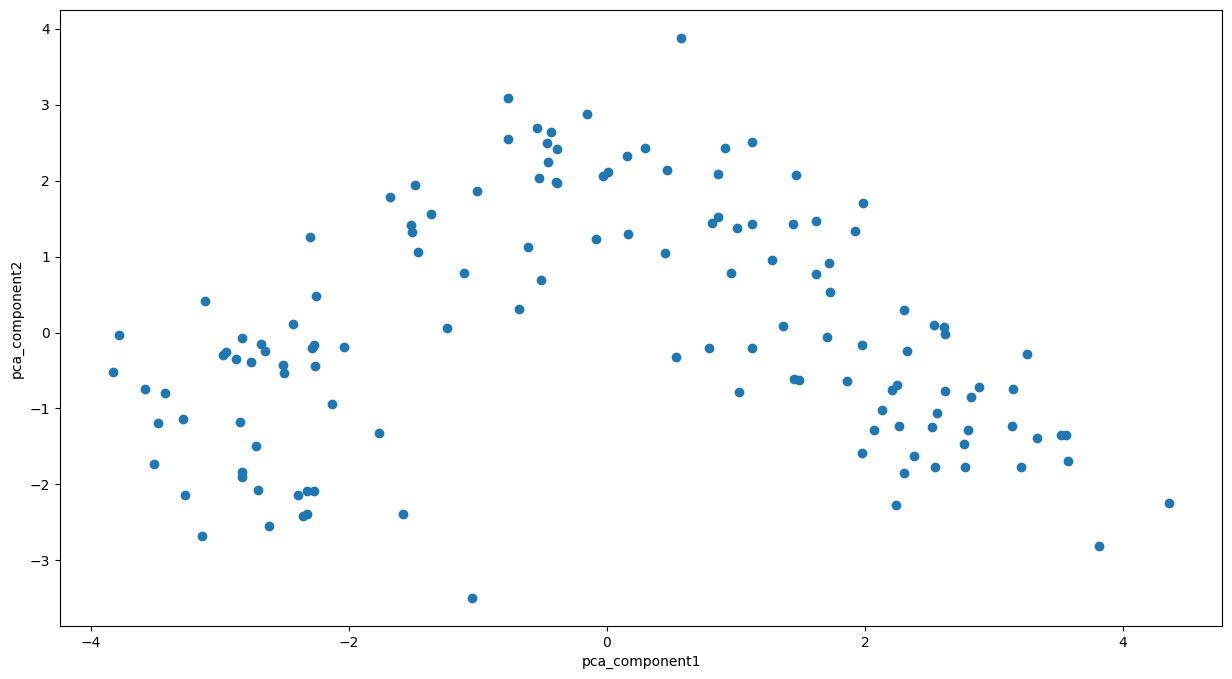

In [116]:
# 라벨 미적용 PCA 데이터
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
plt.scatter(X_tn_pca_df['pca_comp1'],
            X_tn_pca_df['pca_comp2'], 
            marker='o')
plt.xlabel('pca_component1')
plt.ylabel('pca_component2')
plt.show()

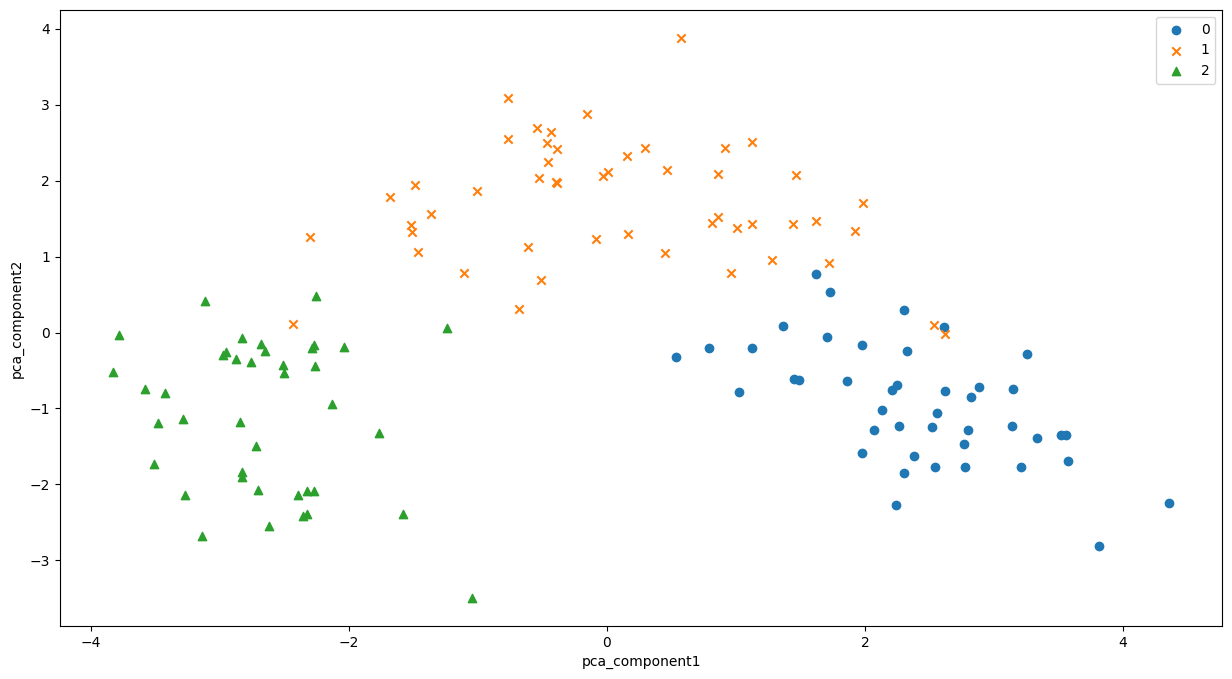

In [117]:
# 라벨 적용 PCA 플랏
df = X_tn_pca_df
df_0 = df[df['target']==0]
df_1 = df[df['target']==1]
df_2 = df[df['target']==2]

X_11 = df_0['pca_comp1']
X_12 = df_1['pca_comp1']
X_13 = df_2['pca_comp1']

X_21 = df_0['pca_comp2']
X_22 = df_1['pca_comp2']

target_0 = 0
target_1 = 1
target_2 = 2
X_23 = df_2['pca_comp2']

plt.figure(figsize=(15,8))
plt.scatter(X_11, X_21, 
            marker='o', 
            label=target_0)
plt.scatter(X_12, X_22, 
            marker='x', 
            label=target_1)
plt.scatter(X_13, X_23, 
            marker='^', 
            label=target_2)
plt.xlabel('pca_component1')
plt.ylabel('pca_component2')
plt.legend()
plt.show()

In [118]:
# 생성된 프레임 데이터를 가지고 머신러닝 해보기
X_tn_pca_df.head(10)

,pca_comp1,pca_comp2,target
0,2.128500,-1.019732,0
1,-2.948125,-0.254807,2
2,1.919795,1.337012,1
3,-2.133376,-0.945897,2
4,2.236803,-2.269839,0
5,-2.287471,-0.199359,2
6,-2.972450,-0.296523,2
7,2.618098,-0.776070,0
8,-1.047055,-3.490933,2
9,2.609816,0.073457,0


In [ ]:
# 모형을 불러온다음에 fitting


In [119]:
#배깅
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
clf_bagging = BaggingClassifier(base_estimator=GaussianNB(),
                        n_estimators=10, 
                        random_state=0)
clf_bagging.fit(X_tn_pca, y_tn)

BaggingClassifier(base_estimator=GaussianNB(), random_state=0)

In [127]:
# 예측 
pred_bagging = clf_bagging.predict(X_te_pca)# 예측을 할 X_te_pca 데이터를 넣어야 한다.
print(pred_bagging)

[0 2 1 0 1 0 0 2 1 1 2 2 0 1 2 1 0 0 1 0 1 0 0 1 1 1 1 1 1 2 0 0 1 0 0 0 2
 1 1 2 0 0 1 1 1]


In [128]:
# 정확도(accuracy)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_te, pred_bagging)
print(accuracy)

0.9777777777777777


In [129]:
# 정밀도(precision)
from sklearn.metrics import precision_score
precision = precision_score(y_te, pred_bagging, average='macro')
print(precision)

0.9803921568627452


In [130]:
# 리콜
from sklearn.metrics import recall_score
recall = recall_score(y_te, pred_bagging, average='macro')
print(recall)

0.9841269841269842


In [131]:
# f1 score
from sklearn.metrics import f1_score
f1 = f1_score(y_te, pred_bagging, average='macro')
print(f1)

0.9817689085981769


In [132]:
# confusion matrix 확인 
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_te, pred_bagging)
print(conf_matrix)

[[16  0  0]
 [ 1 20  0]
 [ 0  0  8]]


In [133]:
# 분류 레포트 확인
from sklearn.metrics import classification_report
class_report = classification_report(y_te, pred_bagging)
print(class_report)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        16
           1       1.00      0.95      0.98        21
           2       1.00      1.00      1.00         8

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [122]:
y_te

54     0
151    2
63     1
55     0
123    1
121    1
7      0
160    2
106    1
90     1
141    2
146    2
5      0
98     1
168    2
80     1
33     0
18     0
61     1
51     0
66     1
37     0
4      0
104    1
60     1
111    1
126    1
86     1
112    1
164    2
26     0
56     0
129    1
45     0
8      0
44     0
161    2
92     1
94     1
174    2
24     0
30     0
93     1
101    1
113    1
Name: class, dtype: int64

In [124]:
y_te.shape

(45,)

In [126]:
pred_bagging.shape

(133,)

# DB SCAN 실습

In [134]:
# 데이터 생성
from sklearn.datasets import make_moons
X,y = make_moons(n_samples=300, 
                 noise=0.05 ,
                 random_state=0)

In [135]:
# 생성된 데이터 차원 확인
print(X.shape)
print(y.shape)

(300, 2)
(300,)


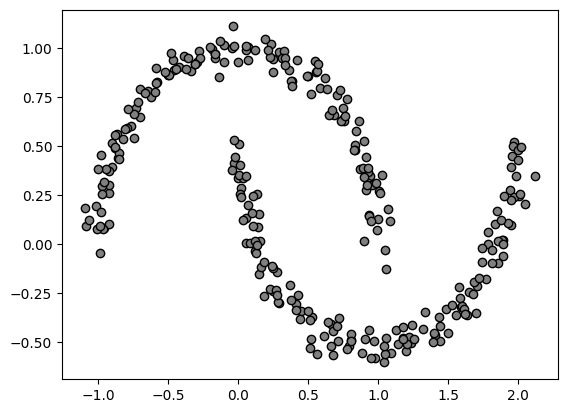

In [136]:
# 라벨링 되지 않은 데이터 플랏
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], 
            c='gray', 
            edgecolor='black', 
            marker='o')
plt.show()

In [137]:
# DB scan
from sklearn.cluster import DBSCAN
dbs = DBSCAN(eps=0.2)
dbs.fit(X)
label_dbs = dbs.labels_
print(label_dbs)

[0 0 1 0 0 1 0 0 1 1 0 1 0 0 1 1 0 1 0 0 0 1 1 1 0 1 0 0 0 0 1 1 1 1 0 0 0
 0 0 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 1 1 1 0 0 0 1
 1 0 1 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0
 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 1 1 0 1 0 1 1 1
 1 0 0 1 0 0 0 1 1 1 0 1 0 1 1 0 1 1 1 0 1 0 0 1 0 1 0 0 1 0 0 1 1 1 0 0 1
 1 0 1 0 1 0 0 1 0 1 1 1 0 1 0 0 0 1 1 1 1 0 1 0 1 0 1 1 1 0 1 0 1 0 0 0 1
 1 0 1 0 1 1 0 0 1 0 1 1 0 1 1 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 0 1
 1 0 0 0 0 0 1 1 1 0 0 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 1 0 1 1 1 0 0 0 1 0 0
 0 1 1 0]


In [138]:
# 시각화를 위한 데이터프레임 생성
import pandas as pd
dbs_columns = ['dbs_comp1', 'dbs_comp2']
X_dbs_df = pd.DataFrame(X, columns=dbs_columns)
X_dbs_df['target'] = y
X_dbs_df['label_dbs'] = label_dbs
X_dbs_df.head(5)

,dbs_comp1,dbs_comp2,target,label_dbs
0,0.715413,-0.494089,1,0
1,0.246789,-0.240091,1,0
2,0.943261,0.346800,0,1
3,0.973742,-0.492901,1,0
4,1.239713,-0.411411,1,0


In [139]:
# 타겟 클래스 종류 확인
print(set(X_dbs_df['target']))
print(set(X_dbs_df['label_dbs']))

{0, 1}
{0, 1}


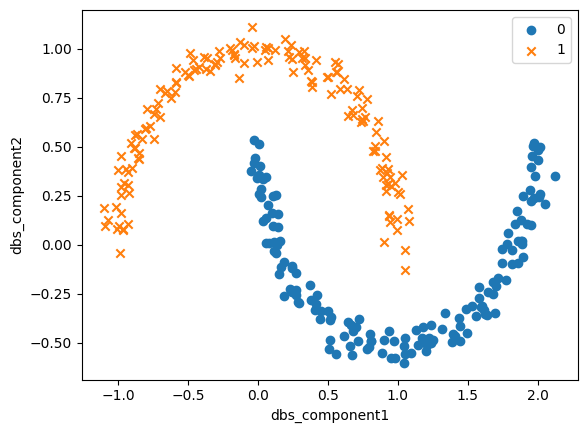

In [140]:
# DB scan을 이용한 데이터 플랏
df = X_dbs_df
markers=['o','x']

for i, mark in enumerate(markers):
    df_i = df[df['label_dbs']==i]
    target_i = i
    X1 = df_i['dbs_comp1']
    X2 = df_i['dbs_comp2']
    plt.scatter(X1, X2, 
                marker=mark, 
                label=target_i)

plt.xlabel('dbs_component1')
plt.ylabel('dbs_component2')
plt.legend()
plt.show()

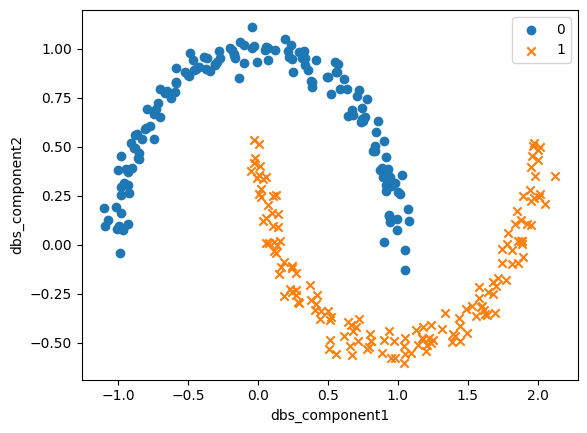

In [141]:
# 실제 타겟 플랏
df = X_dbs_df
markers=['o','x']

for i, mark in enumerate(markers):
    df_i = df[df['target']==i]
    target_i = i
    X1 = df_i['dbs_comp1']
    X2 = df_i['dbs_comp2']
    plt.scatter(X1, X2, 
                marker=mark, 
                label=target_i)

plt.xlabel('dbs_component1')
plt.ylabel('dbs_component2')
plt.legend()
plt.show()

In [142]:
# 모형 평가
from sklearn.metrics import silhouette_score
sil_score = silhouette_score(X, label_dbs)
print(sil_score)

0.3284782012631504


# 크로스밸리데이션 

In [144]:
df = pd.read_csv("wine_data.csv")
df

,Alcohol,Malic,Ash,Alcalinity,Magesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


In [145]:
features = ['Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magesium', 'Phenols', 'Flavanoids', 
            'Nonflavanoids', 'Proanthocyanins', 'Color','Hue', 'Dilution', 'Proline']

X = df[features]
y = df['class']

In [146]:
# 트레이닝/테스트 데이터 분할
from sklearn.model_selection import train_test_split
X_tn, X_te, y_tn, y_te=train_test_split(X,y,random_state=0)

In [147]:
# 데이터 표준화
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale.fit(X_tn)
X_tn_std = std_scale.transform(X_tn)
X_te_std  = std_scale.transform(X_te)

In [148]:
# 그리드 서치 학습
from sklearn import svm 
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

param_grid= {'kernel': ('linear', 'rbf'),
            'C': [0.5, 1, 10, 100]}
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
svc = svm.SVC(random_state=0)
grid_cv = GridSearchCV(svc, param_grid, cv=kfold, scoring='accuracy')
grid_cv.fit(X_tn_std, y_tn)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             estimator=SVC(random_state=0),
             param_grid={'C': [0.5, 1, 10, 100], 'kernel': ('linear', 'rbf')},
             scoring='accuracy')

In [149]:
# 그리드 서치 결과 확인
grid_cv.cv_results_

{'mean_fit_time': array([0.00183225, 0.00172195, 0.00100174, 0.00175614, 0.00085897,
        0.00098395, 0.00065222, 0.0008986 ]),
 'std_fit_time': array([6.53416502e-04, 4.37835711e-05, 5.09842620e-05, 8.55400588e-04,
        9.81350566e-05, 4.56465430e-05, 3.55675774e-05, 3.21198586e-05]),
 'mean_score_time': array([0.00053291, 0.00060763, 0.000422  , 0.00050702, 0.00026226,
        0.0003396 , 0.00020857, 0.00030098]),
 'std_score_time': array([2.17376374e-04, 3.00772763e-05, 2.34116459e-04, 9.75709036e-05,
        3.53377838e-05, 5.84509782e-06, 9.01890562e-06, 1.43595296e-05]),
 'param_C': masked_array(data=[0.5, 0.5, 1, 1, 10, 10, 100, 100],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['linear', 'rbf', 'linear', 'rbf', 'linear', 'rbf',
                    'linear', 'rbf'],
              mask=[False, False, False, False, False, False, False, False],
        fill_

In [150]:
# 그리드 서치 결과 학인(데이터프레임)

import numpy as np
import pandas as pd

np.transpose(pd.DataFrame(grid_cv.cv_results_))

,0,1,2,3,4,5,6,7
mean_fit_time,0.001832,0.001722,0.001002,0.001756,0.000859,0.000984,0.000652,0.000899
std_fit_time,0.000653,0.000044,0.000051,0.000855,0.000098,0.000046,0.000036,0.000032
mean_score_time,0.000533,0.000608,0.000422,0.000507,0.000262,0.00034,0.000209,0.000301
std_score_time,0.000217,0.00003,0.000234,0.000098,0.000035,0.000006,0.000009,0.000014
param_C,0.5,0.5,1,1,10,10,100,100
param_kernel,linear,rbf,linear,rbf,linear,rbf,linear,rbf
params,"{'C': 0.5, 'kernel': 'linear'}","{'C': 0.5, 'kernel': 'rbf'}","{'C': 1, 'kernel': 'linear'}","{'C': 1, 'kernel': 'rbf'}","{'C': 10, 'kernel': 'linear'}","{'C': 10, 'kernel': 'rbf'}","{'C': 100, 'kernel': 'linear'}","{'C': 100, 'kernel': 'rbf'}"
split0_test_score,0.888889,0.962963,0.888889,0.925926,0.888889,0.925926,0.888889,0.925926
split1_test_score,0.962963,1.0,0.962963,0.962963,0.962963,0.962963,0.962963,0.962963
split2_test_score,0.925926,0.962963,0.925926,0.962963,0.925926,0.962963,0.925926,0.962963


In [151]:
# 베스트 스코어
grid_cv.best_score_

0.9774928774928775

In [152]:
# 베스트 하이퍼파라미터
grid_cv.best_params_

{'C': 0.5, 'kernel': 'rbf'}

In [153]:
# 최종 모형
clf = grid_cv.best_estimator_
print(clf)

SVC(C=0.5, random_state=0)


In [154]:
# 크로스 밸리데이션 스코어 확인(1)
from sklearn.model_selection import cross_validate
metrics = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
cv_scores = cross_validate(clf, X_tn_std, y_tn, 
                           cv=kfold, scoring=metrics)
cv_scores

{'fit_time': array([0.00364494, 0.00312495, 0.00216889, 0.00199795, 0.00176072]),
 'score_time': array([0.00547004, 0.00319695, 0.00278687, 0.00225496, 0.00240731]),
 'test_accuracy': array([0.96296296, 1.        , 0.96296296, 0.96153846, 1.        ]),
 'test_precision_macro': array([0.96296296, 1.        , 0.96969697, 0.96969697, 1.        ]),
 'test_recall_macro': array([0.96666667, 1.        , 0.96296296, 0.95833333, 1.        ]),
 'test_f1_macro': array([0.9628483 , 1.        , 0.96451914, 0.96190476, 1.        ])}

In [155]:
# 크로스 밸리데이션 스코어 확인(2)
from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(clf, X_tn_std, y_tn, 
                         cv=kfold, scoring='accuracy')
print(cv_score)
print(cv_score.mean())
print(cv_score.std())

[0.96296296 1.         0.96296296 0.96153846 1.        ]
0.9774928774928775
0.01838434849561446


In [156]:
# 예측
pred_svm = clf.predict(X_te_std)
print(pred_svm)

[0 2 1 0 1 1 0 2 1 1 2 2 0 1 2 1 0 0 1 0 1 0 0 1 1 1 1 1 1 2 0 0 1 0 0 0 2
 1 1 2 0 0 1 1 1]


In [157]:
# 정확도
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_te, pred_svm)
print(accuracy)

1.0


In [158]:
# confusion matrix 확인 
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_te, pred_svm)
print(conf_matrix)

[[16  0  0]
 [ 0 21  0]
 [ 0  0  8]]


In [159]:
# 분류 레포트 확인
from sklearn.metrics import classification_report
class_report = classification_report(y_te, pred_svm)
print(class_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00         8

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

